# Data Visualization with Matplotlib

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

#make array with 10 variable from 0-9
x = np.arange(10)

#make 10 random integer variable
#value is between 1 and 15
y = np.random.randint(1, 15, 10)

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 6 13 10  7  4  5  1  5 11 14]


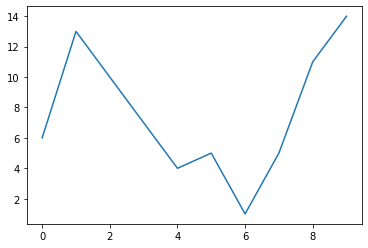

In [16]:
plt.figure() # untuk mendefinisikan figure / mengatur ukuran figure
plt.plot(x, y)
plt.show() # Untuk memunculkan Plot tanpa keterangan

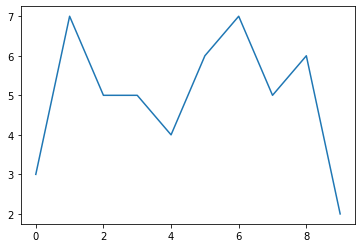

In [17]:
z = np.array([3,7,5,5,4,6,7,5,6,2])

plt.figure()
plt.plot(x, z)
plt.show()

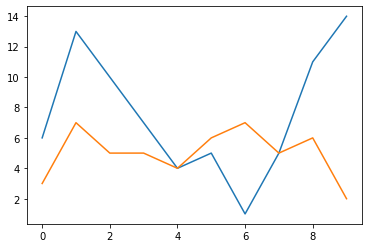

In [18]:
# Menggabungkan 2 plot atau lebih dalam satu axes dan figure
plt.figure()
plt.plot(x, y, x, z)
plt.show()

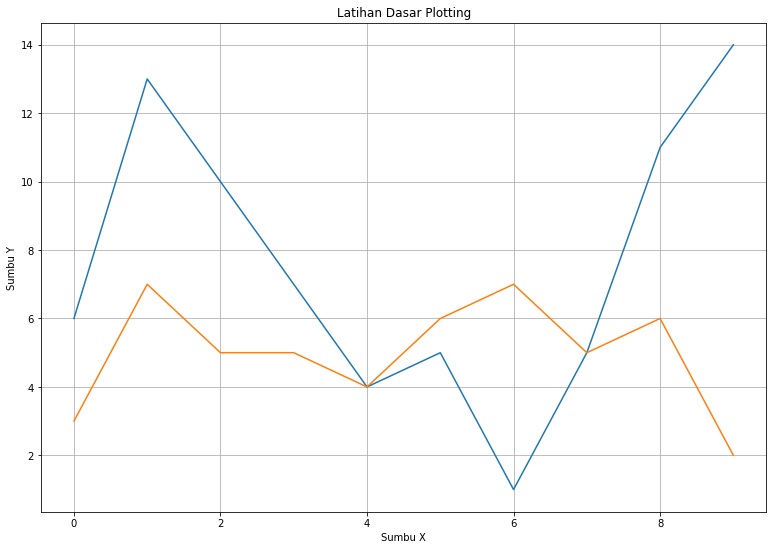

In [19]:
# Plot 2 grafik dalam 1 axes dan figure
plt.figure(figsize=(13,9)) #untuk mengatur ukuran figure
plt.plot(x,y, x,z) # untuk membuat plot (2 plot dalam 1 axes)
plt.title('Latihan Dasar Plotting') # untuk membuat Judul plot
plt.xlabel('Sumbu X') # untuk memberikan label pada sumbu X
plt.ylabel('Sumbu Y') # untuk memberikan label pada sumbu Y
plt.grid(True) # Untuk memunculkan grid pada plot
plt.show() 

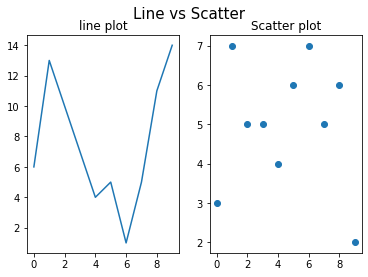

In [20]:
# Plot 2 grafik dengan subplot terpisah
plt.figure()
plt.subplot(1,2,1) # subplot(baris, kolom, urutan)
plt.plot(x,y)
plt.title("line plot") # membuat title di subplot

plt.subplot(1,2,2)
plt.scatter(x,z) # scatter plot
plt.title("Scatter plot")

plt.suptitle('Line vs Scatter', size=15) #membuat title keseluruhan
plt.show()


# Machine Learning 
## Facies Classification with kNN

### General step:
- train and validate model in df_comp (well-ph1)
- test and predict facies in df_target (well-ph2)

In [21]:
#Load Data well-ph1
import pandas as pd
df = pd.read_csv('ph1_complete.csv') #load data from CSV
print(df)


          DEPT         GR     RHOB          VP  FACIES
0    4940.0460  150.07190  2.72833  3820.24268       1
1    4940.1984  153.27740  2.72637  3798.05396       1
2    4940.3508  155.58180  2.72202  3775.34277       1
3    4940.5032  155.97696  2.72029  3764.78662       1
4    4940.6556  153.99037  2.72137  3766.25977       1
..         ...        ...      ...         ...     ...
455  5009.3880   13.87138  2.48817  4883.83447       0
456  5009.5404   13.30794  2.48556  4878.48975       0
457  5009.6928   12.32699  2.48054  4870.06494       0
458  5009.8452   11.63948  2.47144  4847.33887       0
459  5009.9976   11.40202  2.46054  4809.12109       0

[460 rows x 5 columns]


In [22]:
#create well log data plot function

import matplotlib.colors as colors
facies_colors = ['yellow','green'] #yellow and green color
cmap_facies = colors.ListedColormap(facies_colors) #make color into colormap

def well_plot(df):
    #menentukan top dan bottom dari DEPTH
    top=df['DEPT'].max()
    bot=df['DEPT'].min()

    #plotting
    plt.figure()
    plt.subplot(1,4,1)
    plt.plot(df.RHOB, df.DEPT, color='b')
    plt.ylim(top,bot) #menentukan batas bawah dan batas atas (dibalik)
    plt.grid()
    plt.xlabel("Density (g/cc)")
    plt.ylabel('Depth (m)')
    plt.xlim(df.RHOB.min(),df.RHOB.max()) #menentukan limit RHOB

    plt.subplot(1,4,2)
    plt.plot(df.GR, df.DEPT, color='b')
    plt.gca().axes.yaxis.set_ticklabels([]) #menghilangkan angka pada y-axis
    plt.ylim(top,bot)
    plt.grid()
    plt.xlabel("Gamma Ray")
    plt.xlim(df.GR.min(),df.GR.max())

    plt.subplot(1,4,3)
    plt.plot(df.VP, df.DEPT, color='b')
    plt.gca().axes.yaxis.set_ticklabels([])
    plt.ylim(top,bot)
    plt.grid()
    plt.xlabel("Vp (m/s)")
    plt.xlim(df.VP.min(),df.VP.max())

    plt.subplot(1,4,4)
    C = np.stack((df.FACIES,df.FACIES),axis=1)
    #membuat matriks dengan 2 kolom
    plt.imshow(C, aspect='auto',extent=[0,1,top,bot],cmap = cmap_facies)
    #visualisasi image (bukan plot) dari matrix
    plt.gca().axes.yaxis.set_ticklabels([])
    plt.xlabel('facies')
    plt.ylim(top,bot)

    plt.show()

In [23]:
#Split X (predictor) and Y (target)
df_comp = df

X = df_comp.drop(['DEPT','FACIES'],axis = 1)
y = df_comp['FACIES']
print(X)
print(y)

            GR     RHOB          VP
0    150.07190  2.72833  3820.24268
1    153.27740  2.72637  3798.05396
2    155.58180  2.72202  3775.34277
3    155.97696  2.72029  3764.78662
4    153.99037  2.72137  3766.25977
..         ...      ...         ...
455   13.87138  2.48817  4883.83447
456   13.30794  2.48556  4878.48975
457   12.32699  2.48054  4870.06494
458   11.63948  2.47144  4847.33887
459   11.40202  2.46054  4809.12109

[460 rows x 3 columns]
0      1
1      1
2      1
3      1
4      1
      ..
455    0
456    0
457    0
458    0
459    0
Name: FACIES, Length: 460, dtype: int64


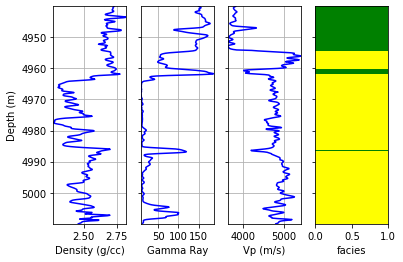

In [24]:
#plot well-ph1
well_plot(df_comp)

In [25]:
#standardizing data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler().fit(X)
X_std=sc.transform(X)
print(X_std)

print(X_std.min())
print(X_std.max())

[[ 1.60682037  1.4170583  -1.69497284]
 [ 1.66199788  1.40220288 -1.7418465 ]
 [ 1.70166441  1.36923295 -1.78982389]
 ...
 [-0.76423586 -0.46101524  0.52277651]
 [-0.77607023 -0.52998683  0.4747677 ]
 [-0.78015772 -0.61260114  0.39403264]]
-2.0888380170528484
2.2419979111504107


In [26]:
print(X)

            GR     RHOB          VP
0    150.07190  2.72833  3820.24268
1    153.27740  2.72637  3798.05396
2    155.58180  2.72202  3775.34277
3    155.97696  2.72029  3764.78662
4    153.99037  2.72137  3766.25977
..         ...      ...         ...
455   13.87138  2.48817  4883.83447
456   13.30794  2.48556  4878.48975
457   12.32699  2.48054  4870.06494
458   11.63948  2.47144  4847.33887
459   11.40202  2.46054  4809.12109

[460 rows x 3 columns]


In [27]:
#train and test splitting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(X_std,y, test_size=0.2,  stratify = y, random_state=10)

#stratify y (the proportion of each facies in train and validation data must be the same)
shale_train = int(len(y_train[y_train==1])/len(y_train)*100)

shale_val = int(len(y_val[y_val==1])/len(y_val)*100)

print('shale on training data is ' + str(shale_train) + ' percent')
print('shale on validation data is ' + str(shale_val) + ' percent')

shale on training data is 23 percent
shale on validation data is 23 percent


In [28]:
#kNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

#fit and predict to train and validation data
knn.fit(X_train, y_train) #fit model to training data
y_pred_train = knn.predict(X_train) #predict model to training data
y_pred = knn.predict(X_val) #predict model to testing data

In [29]:
#performance evaluation
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       281
           1       0.98      1.00      0.99        87

    accuracy                           0.99       368
   macro avg       0.99      1.00      0.99       368
weighted avg       0.99      0.99      0.99       368

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        22

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [30]:
#load well-ph2
df_target = pd.read_csv('ph2_target.csv')
X_test = df_target
print(X_test)

          DEPT        GR     RHOB          VP
0    4400.0928  51.31930  2.41280  4843.46362
1    4400.2452  51.53658  2.43140  4860.34131
2    4400.3976  48.50318  2.44562  4874.98633
3    4400.5500  42.97136  2.44510  4888.49072
4    4400.7024  36.64860  2.42774  4920.08203
..         ...       ...      ...         ...
520  4479.3408  96.83217  2.56725  4074.19165
521  4479.4932  95.38441  2.56478  4064.13892
522  4479.6456  95.31112  2.55866  4041.96680
523  4479.7980  96.32029  2.55041  4016.57104
524  4479.9504  98.59708  2.54491  3996.66406

[525 rows x 4 columns]


In [31]:
#define predictor for well-ph2
X_test = df_target.drop(['DEPT'],axis = 1)
print(X_test)

           GR     RHOB          VP
0    51.31930  2.41280  4843.46362
1    51.53658  2.43140  4860.34131
2    48.50318  2.44562  4874.98633
3    42.97136  2.44510  4888.49072
4    36.64860  2.42774  4920.08203
..        ...      ...         ...
520  96.83217  2.56725  4074.19165
521  95.38441  2.56478  4064.13892
522  95.31112  2.55866  4041.96680
523  96.32029  2.55041  4016.57104
524  98.59708  2.54491  3996.66406

[525 rows x 3 columns]


In [32]:
#standardisasi data
sc=StandardScaler().fit(X_test)
X_test_std = sc.transform(X_test)

#prediction with previous model (model at well-ph1)
y_pred_test = knn.predict(X_test_std)


In [33]:
#assign prediksi fasies ke dataframe
df_target['FACIES'] = y_pred_test
print(df_target)

          DEPT        GR     RHOB          VP  FACIES
0    4400.0928  51.31930  2.41280  4843.46362       0
1    4400.2452  51.53658  2.43140  4860.34131       0
2    4400.3976  48.50318  2.44562  4874.98633       0
3    4400.5500  42.97136  2.44510  4888.49072       0
4    4400.7024  36.64860  2.42774  4920.08203       0
..         ...       ...      ...         ...     ...
520  4479.3408  96.83217  2.56725  4074.19165       1
521  4479.4932  95.38441  2.56478  4064.13892       1
522  4479.6456  95.31112  2.55866  4041.96680       1
523  4479.7980  96.32029  2.55041  4016.57104       1
524  4479.9504  98.59708  2.54491  3996.66406       1

[525 rows x 5 columns]


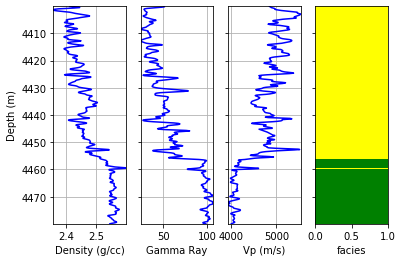

In [34]:
#plot well-ph2 (after facies prediction)
well_plot(df_target)

In [35]:
#export data
df_target.to_csv('fasies.csv')